# Boston housing dataset

## Explain the feature
Variables There are 14 attributes in each case of the dataset. They are:
1. `CRIM` - per capita crime rate by town
2. `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
3. `INDUS` - proportion of non-retail business acres per town.
4. `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. `NOX` - nitric oxides concentration (parts per 10 million)
6. `RM` - average number of rooms per dwelling
7. `AGE` - proportion of owner-occupied units built prior to 1940
8. `DIS` - weighted distances to five Boston employment centres
9. `RAD` - index of accessibility to radial highways
10. `TAX` - full value property tax rate per $10,000
11. `PTRATIO` - pupil-teacher ratio by town
12. `LSTAT` -  lower status of the population
13. `MEDV` - Median value of owner-occupied homes in 1000's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Datasets/HousingData.csv')

In [3]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

# Data Pre-Processing

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.drop('B', axis=1, inplace=True)

### 1. Duplicate Data

In [7]:
df.duplicated().sum()   # No duplicated here

np.int64(0)

### 2. Missing Values

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df['CRIM'].fillna(df['CRIM'].median(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].median(), inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9052\521682831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].fillna(df['CRIM'].median(), inplace=True)
C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9052\521682831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
df_clean = df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


### 3. Outliers

In [12]:
df_clean.describe().T

count        mean         std        min         25%         50%  \
CRIM     506.0    3.479140    8.570832    0.00632    0.083235    0.253715   
ZN       506.0   11.211934   22.921051    0.00000    0.000000    0.000000   
INDUS    506.0   11.083992    6.699165    0.46000    5.190000    9.900000   
CHAS     506.0    0.067194    0.250605    0.00000    0.000000    0.000000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.538000   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.208500   
AGE      506.0   68.845850   27.486962    2.90000   45.925000   76.800000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.207450   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.000000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.000000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.050000   
LSTAT    506.0   12.664625    7.017219    1.73000    7.230000   11.430000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.200000   

                75%       max  
CRIM       2.808720   88.9762  
ZN        11.211934  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       93.575000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
LSTAT     16.570000   37.9700  
MEDV      25.000000   50.0000

C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9052\2538262764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[columns])
C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9052\2538262764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[columns])
C:\Users\Tarun Singh\A

<function matplotlib.pyplot.show(close=None, block=None)>

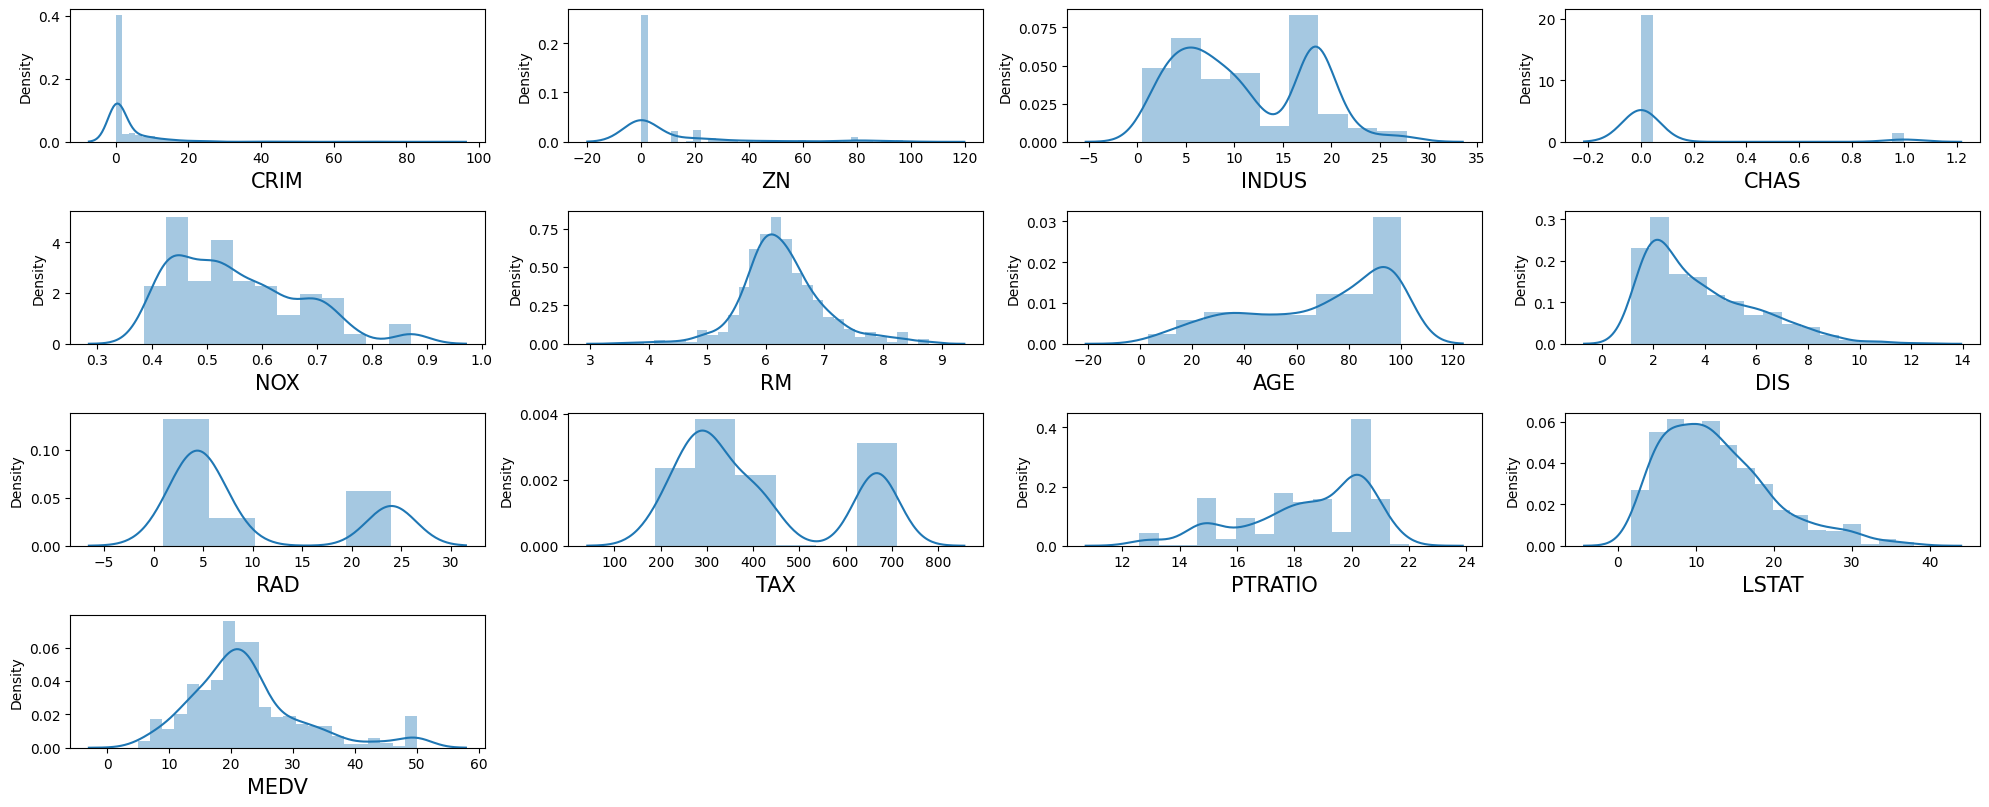

In [13]:
plt.figure(figsize=(20, 40))

plotnum = 1

for columns in df:
    if plotnum <= len(df_clean.columns):
        plt.subplot(20, 4, plotnum)
        sns.distplot(df_clean[columns])
        plt.xlabel(columns, fontsize=15)
    plotnum += 1
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

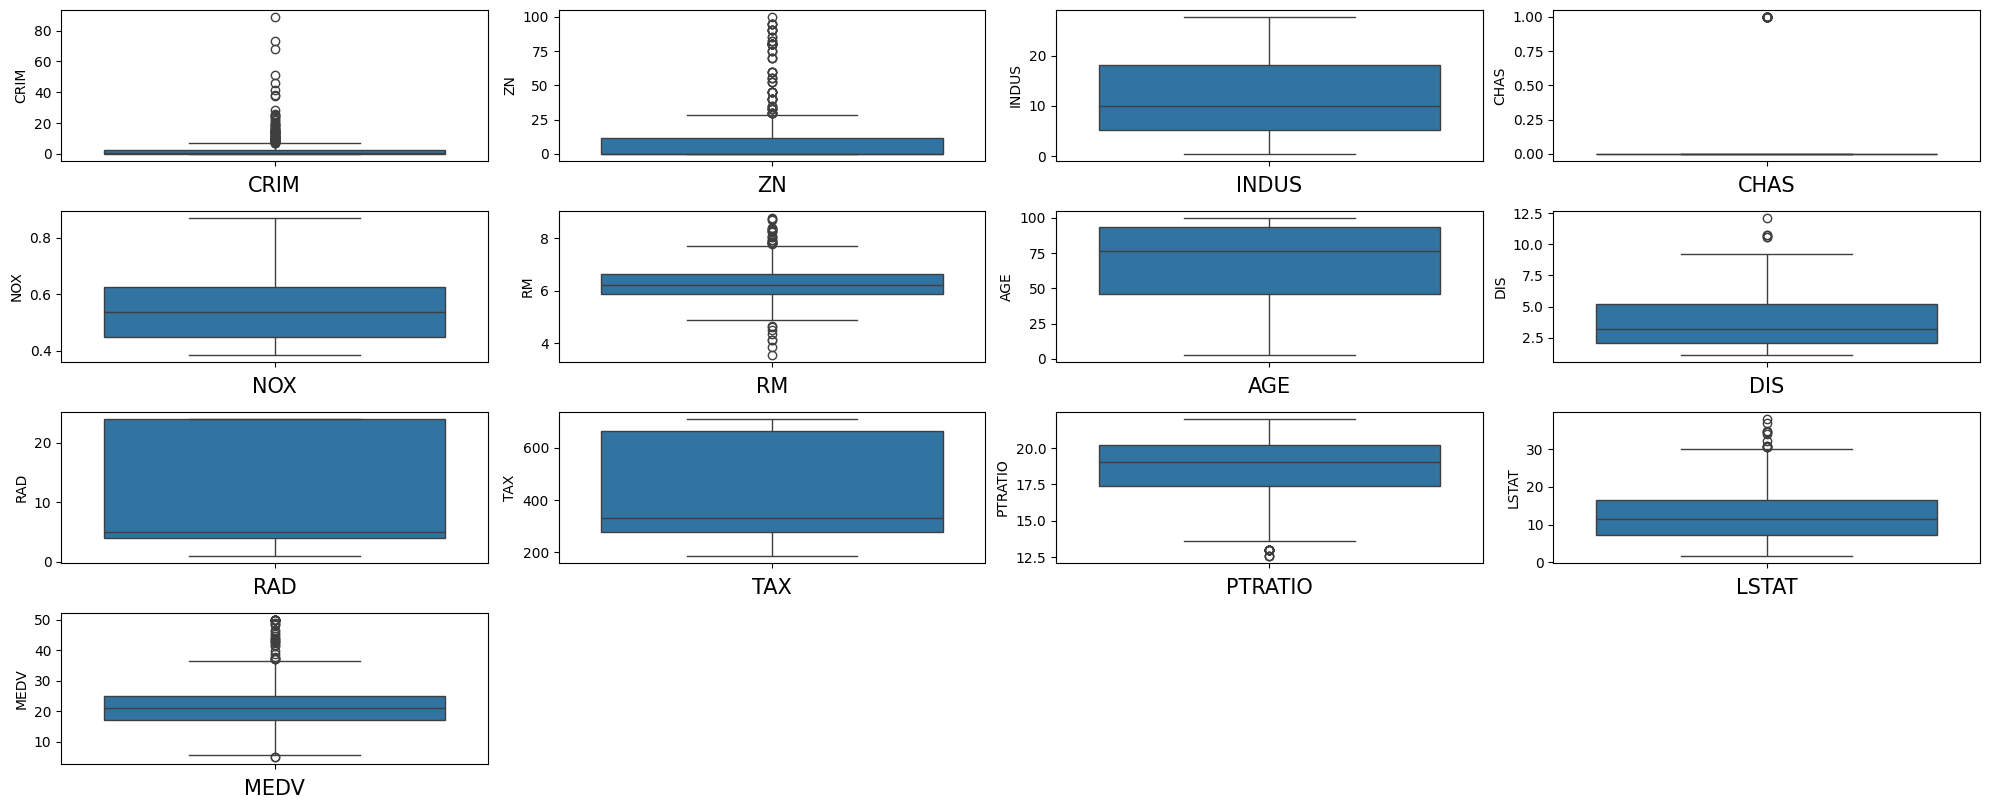

In [14]:
plt.figure(figsize=(20, 40))

plotnum = 1

for columns in df:
    if plotnum <= len(df_clean.columns):
        plt.subplot(20, 4, plotnum)
        sns.boxplot(df_clean[columns])
        plt.xlabel(columns, fontsize=15)
    plotnum += 1
plt.tight_layout()
plt.show

In [15]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # To get all outliers of data
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    # To get all data without outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) | (df_clean[col] <= upper_bound)]


In [16]:
outliers_counts = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True))
print(outlier_counts)

{'CRIM': 81, 'ZN': 68, 'INDUS': 0, 'CHAS': 34, 'NOX': 0, 'RM': 30, 'AGE': 0, 'DIS': 5, 'RAD': 0, 'TAX': 0, 'PTRATIO': 15, 'LSTAT': 12, 'MEDV': 40}


In [17]:
df_clean = df_clean.reset_index()

In [18]:
df_clean.drop('index', axis=1, inplace=True)
df_clean.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

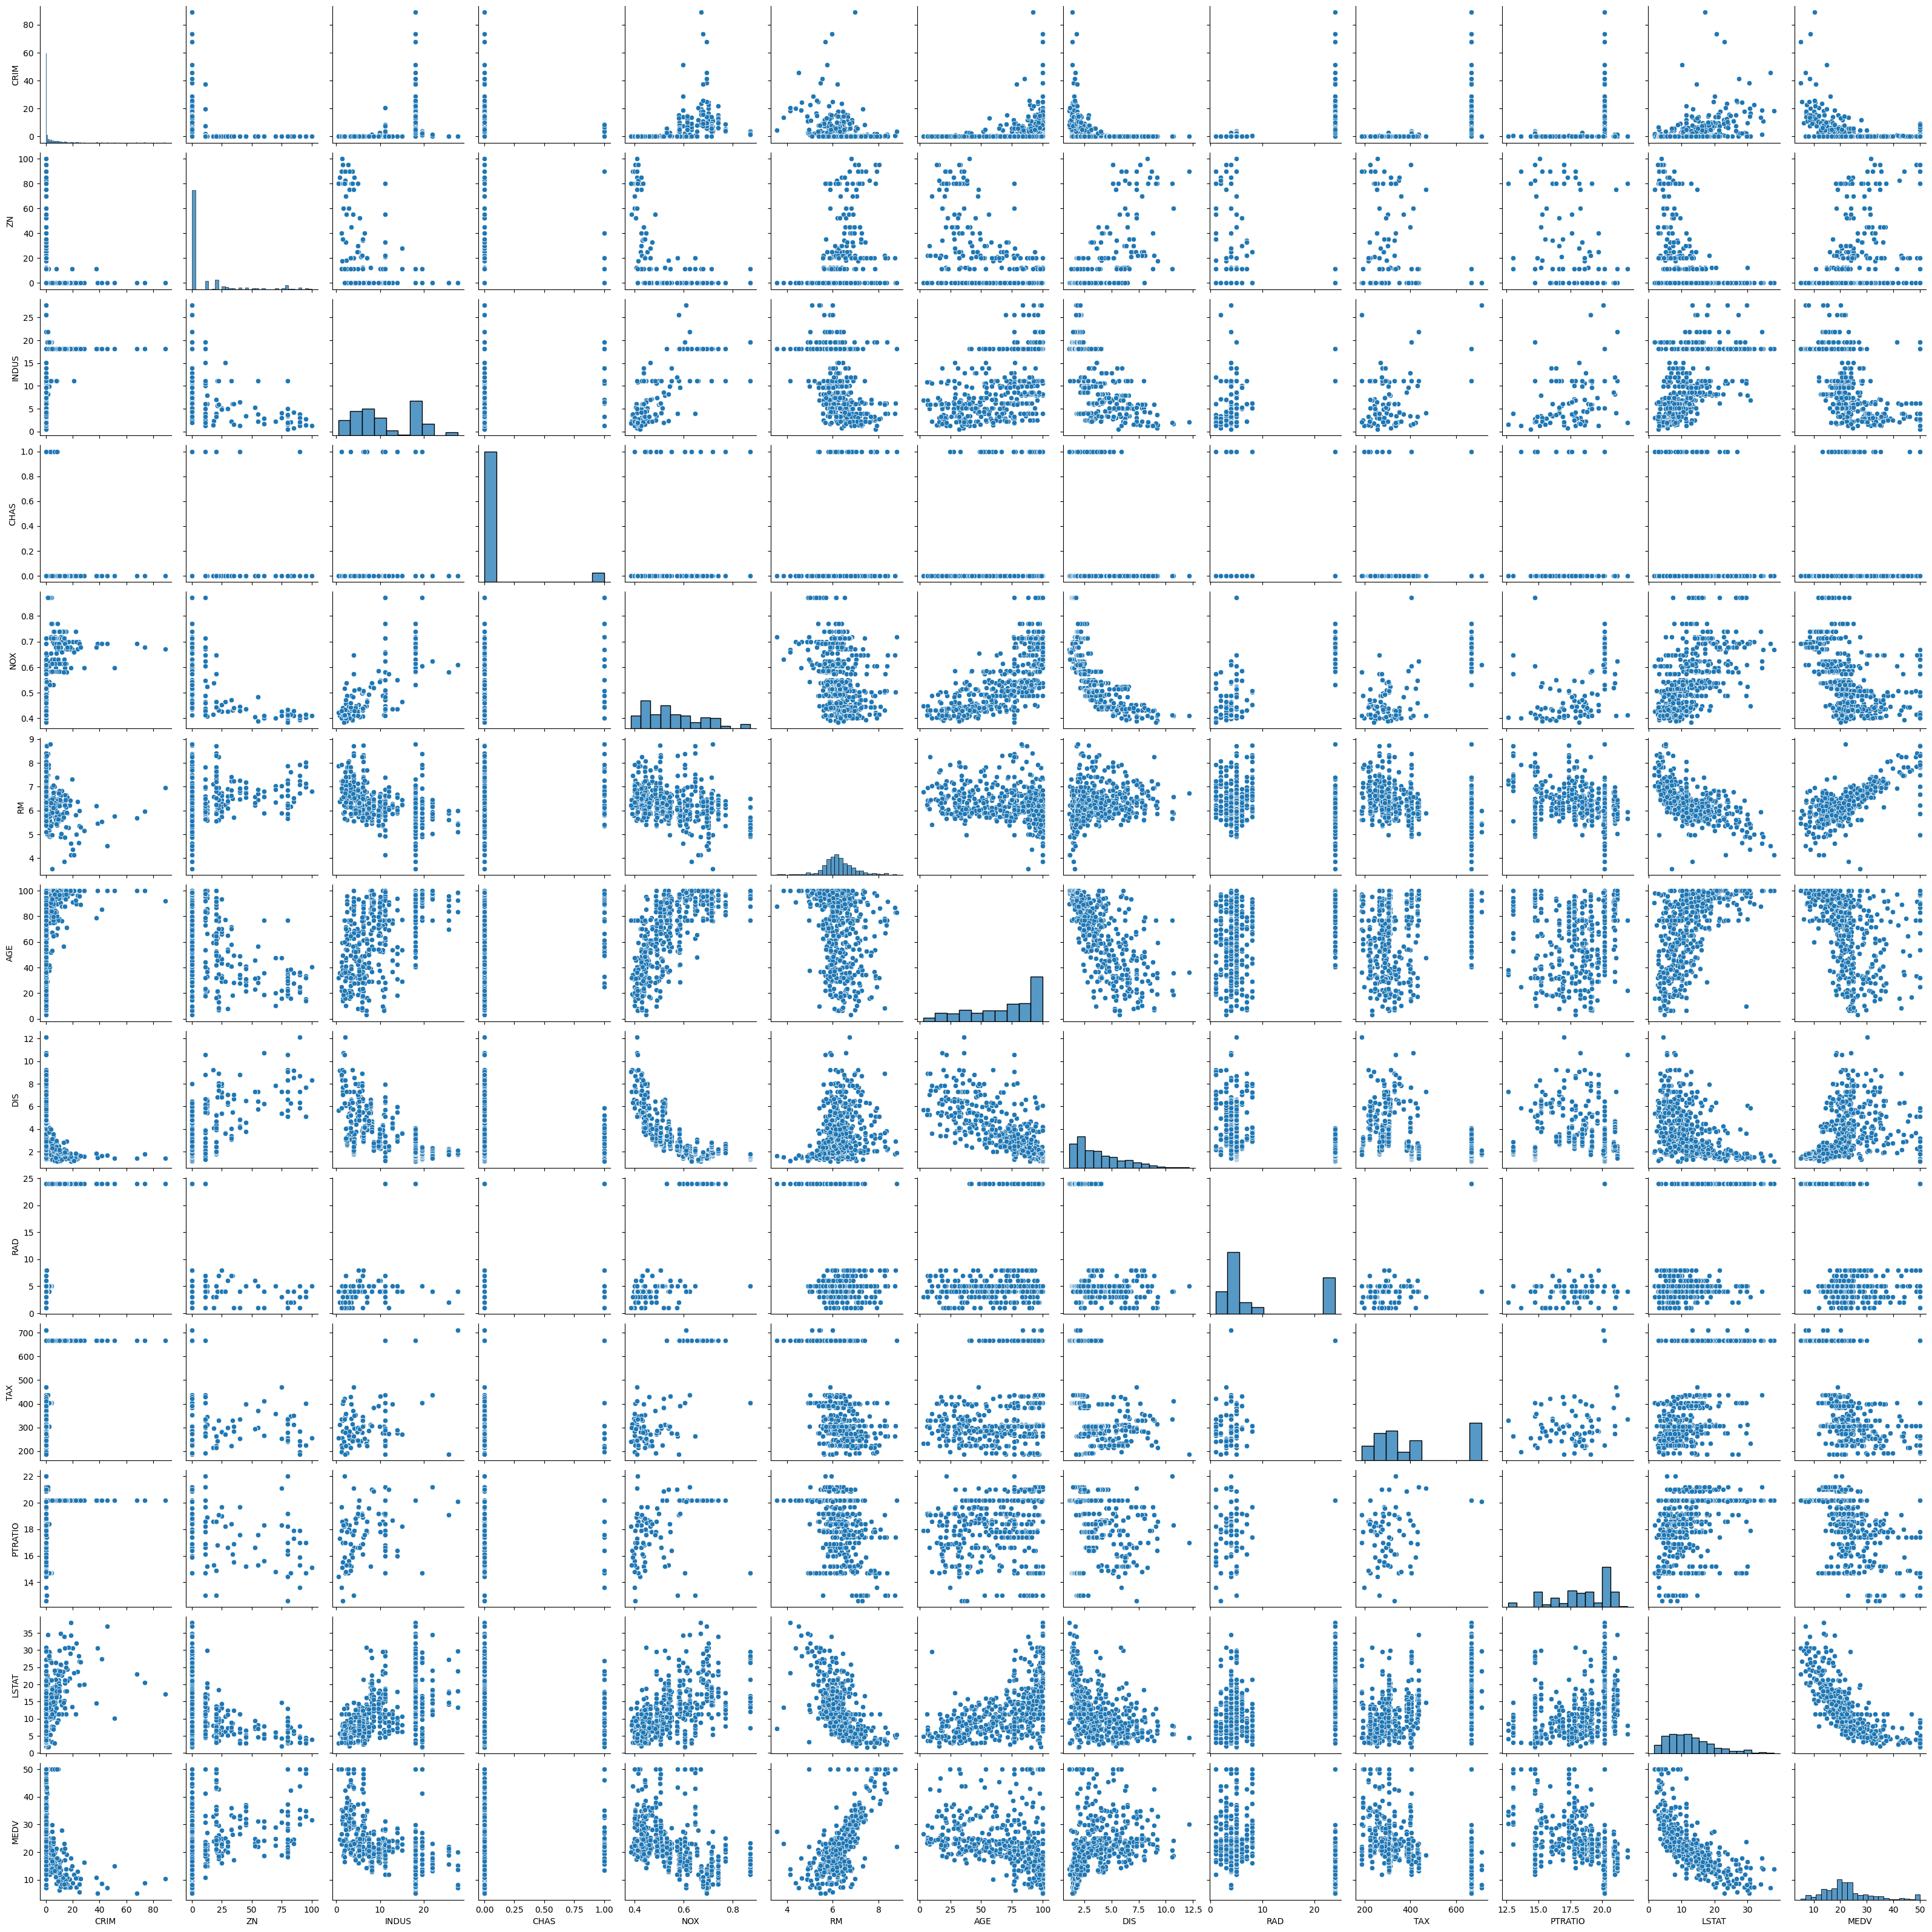

In [19]:
sns.pairplot(df_clean)

### Using Log Transformation

In [20]:
skewed_feature = ['CRIM', 'ZN', 'DIS', 'RAD', 'LSTAT', 'TAX']
for col in df_clean:
    df_clean[col] = np.log1p(df_clean[col])

### Get the correlation between features

<Axes: >

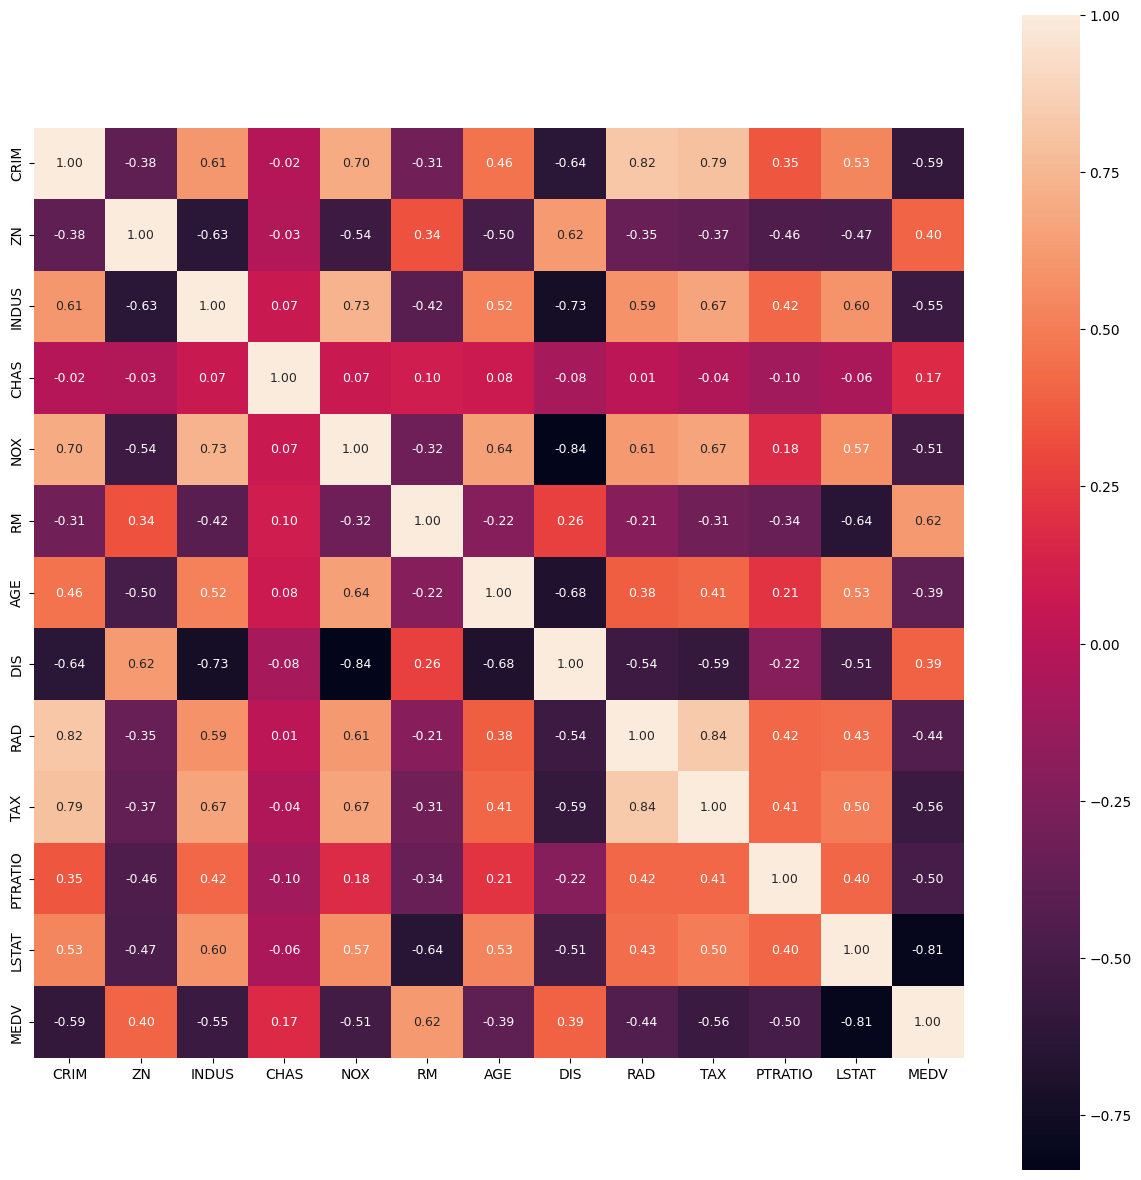

In [21]:
colu = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

corr = df_clean[colu].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, fmt='.2f', cbar=True, square=True, annot=True, annot_kws={'size':9})

### Split the data into x, y

In [22]:
x = df_clean.drop(columns=['MEDV'], axis=1)
y = df_clean.MEDV

### Standardization
Because the algorithms will greatly affect the units and range of values (scale) of the changes.

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [25]:
print(f"x shape  :  {x_scaled.shape}")
print(f"y shape  :  {y.shape}")

x shape  :  (506, 12)
y shape  :  (506,)


### Split x and y into train and test

In [26]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Modeling

### Train the model

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Test the model

In [28]:
y_predict = model.predict(x_test)

# Evaluate the model:

In [29]:
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predict)

In [30]:
print("Model Evaluate Matrics")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared Score (R²): {R2:.2f}")

Model Evaluate Matrics
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared Score (R²): 0.79


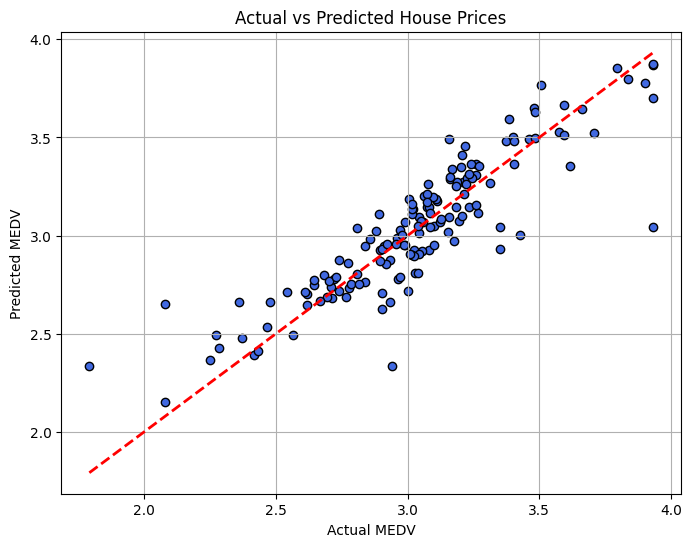

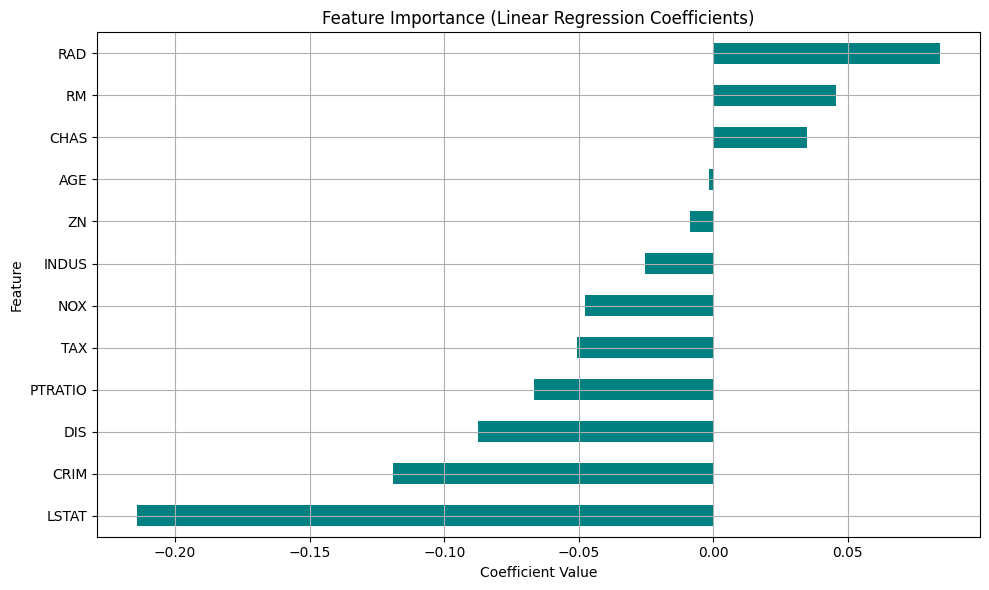

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# ===== Analyze the model parameters (the effect of each feature on the MEDV) =====
coefficients = pd.Series(model.coef_, index=x.columns)
coefficients = coefficients.sort_values()

# Bar plot of the most important effects
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='teal')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Preprocessing and Data Cleaning Theory

**Data preprocessing** is a crucial step in the data mining process. It involves transforming raw data into an understandable and usable format. Real-world data is often incomplete, inconsistent, and noisy, and preprocessing is essential to improve the quality of the data and, consequently, the accuracy and efficiency of subsequent analysis, such as machine learning model training.

**Data cleaning** is a sub-process of data preprocessing that deals with identifying and removing errors, inconsistencies, and outliers from data. The goal is to improve the quality and reliability of the data.

### Common Steps in Data Preprocessing and Cleaning:

1.  **Handling Missing Values:** Missing data can occur due to various reasons, such as errors in data entry, data collection issues, or data corruption. Common techniques to handle missing values include:
    *   **Imputation:** Replacing missing values with a calculated value (e.g., mean, median, mode) or using more advanced techniques like K-nearest neighbors imputation or regression imputation.
    *   **Deletion:** Removing rows or columns with missing values. This should be done cautiously, especially if a large amount of data is missing.
    *   **Prediction:** Using machine learning models to predict the missing values.

2.  **Handling Duplicate Data:** Duplicate entries can lead to biased analysis and inaccurate model training. Identifying and removing duplicate rows is an important step to ensure data integrity.

3.  **Handling Outliers:** Outliers are data points that significantly differ from other observations. They can distort statistical analysis and negatively impact model performance. Techniques to handle outliers include:
    *   **Identification:** Using visualizations (e.g., box plots, scatter plots) or statistical methods (e.g., Z-score, IQR) to detect outliers.
    *   **Removal:** Removing outlier data points. Similar to deleting missing values, this should be done carefully.
    *   **Transformation:** Applying mathematical transformations (e.g., log transformation, square root transformation) to reduce the impact of outliers.
    *   **Capping/Winsorizing:** Limiting the values of outliers to a certain threshold.

4.  **Data Transformation:** This involves converting data from one format to another to make it more suitable for analysis or modeling. Common transformations include:
    *   **Scaling:** Normalizing or standardizing data to bring features to a similar scale. This is essential for many machine learning algorithms that are sensitive to the scale of the features (e.g., gradient descent-based algorithms).
    *   **Log Transformation:** Applying a logarithm to the data to reduce skewness and stabilize variance. This is often used for positively skewed data.

5.  **Feature Engineering:** Creating new features from existing ones to improve the performance of a model. This requires domain knowledge and creativity.

## Data Cleaning and Preprocessing in this Notebook:

In this notebook, the following data cleaning and preprocessing steps were performed on the Boston Housing dataset:

1.  **Loading Data:** The data was loaded from a CSV file into a pandas DataFrame.
2.  **Handling Missing Values:** The notebook identified missing values in several columns (`CRIM`, `ZN`, `INDUS`, `CHAS`, `AGE`, `LSTAT`). Different strategies were used to fill these missing values:
    *   `CRIM`: Filled with the median.
    *   `ZN`, `INDUS`: Filled with the mean.
    *   `CHAS`, `AGE`, `LSTAT`: Filled with the median.
3.  **Handling Duplicate Data:** The notebook checked for duplicate rows and found none.
4.  **Handling Outliers:** The notebook visualized the distribution of features using `distplot` (now recommended to use `histplot`) and `boxplot` to identify potential outliers. It then used the Interquartile Range (IQR) method to identify and remove outliers from the dataset.
5.  **Data Transformation (Log Transformation):** Log transformation using `np.log1p` was applied to selected features (`CRIM`, `ZN`, `DIS`, `RAD`, `LSTAT`, `TAX`) to reduce skewness.
6.  **Data Transformation (Standardization):** The features were standardized using `StandardScaler` to have a mean of 0 and a standard deviation of 1. This is important for the Linear Regression model used later.
7.  **Splitting Data:** The cleaned and preprocessed data was split into features (x) and the target variable (y - `MEDV`), and then further split into training and testing sets for model development and evaluation.

These steps aim to prepare the data for the Linear Regression model by addressing issues like missing values and outliers, and by transforming features to improve model performance.

## Further Theoretical Concepts in Data Preprocessing and Cleaning

Beyond the fundamental steps, several other theoretical concepts are important in data preprocessing and cleaning:

### 1. Data Quality Dimensions:

Understanding the different dimensions of data quality is crucial for effective data cleaning. Some key dimensions include:

*   **Accuracy:** The degree to which data correctly represents the real-world phenomenon it describes.
*   **Completeness:** The extent to which data is free from missing values.
*   **Consistency:** The degree to which data is uniform and adheres to defined formats and rules across different sources or within the same dataset.
*   **Timeliness:** The degree to which data is current and available when needed.
*   **Validity:** The degree to which data conforms to defined data types, formats, and ranges.
*   **Integrity:** The degree to which data is free from contradictions and errors.

Addressing issues in these dimensions is the primary goal of data cleaning.

### 2. Data Integration:

When working with data from multiple sources, **data integration** is a critical preprocessing step. This involves combining data from different sources into a single, unified view. Challenges in data integration include:

*   **Schema Matching:** Identifying corresponding attributes or fields across different data sources.
*   **Entity Resolution:** Identifying and merging records that refer to the same real-world entity but are represented differently in different sources.
*   **Data Transformation:** Converting data from one source to match the format and structure of the target schema.

### 3. Data Reduction:

For large datasets, **data reduction** techniques can be employed to obtain a reduced representation of the data while preserving its important characteristics. This can improve the efficiency of data analysis and mining. Some data reduction techniques include:

*   **Dimensionality Reduction:** Reducing the number of features or attributes. Techniques include:
    *   **Feature Selection:** Selecting a subset of relevant features.
    *   **Feature Extraction:** Creating new features from existing ones (e.g., Principal Component Analysis - PCA).
*   **Numerosity Reduction:** Reducing the number of data records. Techniques include:
    *   **Sampling:** Selecting a representative subset of the data.
    *   **Data Aggregation:** Summarizing data by grouping and aggregating values.
*   **Data Compression:** Using techniques to encode data more efficiently.

### 4. Data Discretization and Concept Hierarchy Generation:

For continuous attributes, **data discretization** can be used to divide the range of a continuous attribute into intervals. This can be useful for certain data mining techniques that work with categorical data. **Concept hierarchy generation** involves grouping or abstracting data to higher-level concepts. This can be useful for analyzing data at different levels of granularity.

### 5. Data Cleaning Process Iteration:

It's important to understand that data cleaning is often an **iterative process**. Initial cleaning steps may reveal new data quality issues that require further investigation and remediation. The process may involve multiple passes through the data, applying different cleaning techniques as needed.

### 6. The Impact of Data Quality on Model Performance:

Poor data quality can significantly impact the performance of machine learning models. Inaccurate, incomplete, or inconsistent data can lead to biased models, poor generalization, and unreliable predictions. Data preprocessing and cleaning are essential to ensure that the data used for model training is of high quality, leading to more accurate and robust models.

By understanding these theoretical concepts, you can gain a deeper appreciation for the importance and complexity of data preprocessing and cleaning in the overall data analysis and mining workflow.